### Juan C. S. Herrera

###**Sweetness and Networks**

In [91]:
#INSTALL AND UPGRADE PACKAGES
#!pip install networkx
#!pip install --upgrade networkx
#!pip install --upgrade pandas
#!pip install --upgrade scikit
#!pip install --upgrade matplotlib
#!pip install --upgrade networkx
#!pip install --upgrade scikit-learn

In [92]:
#IMPORT PACKAGES
#library for data management as data frames
import pandas as pd
#for network science
import networkx as nx
from networkx.algorithms import bipartite
#plotting and visualizations
import matplotlib.pyplot as plt
#sklearn (Jaccard)
from sklearn.metrics import pairwise_distances
import numpy as np

**3. ** Import data

In [93]:
# Convert to a DataFrame and render.
carrusel_df = pd.read_csv('/Users/juan/Dropbox/ACADEMICO/NYU PHD/Dissertation/paper3carrusel/Carruseldata/twocategories.csv')

#convert year, month, day to numeric variables
carrusel_df[["month", "day", "year", "sweetener"]] = carrusel_df[["month", "day", "year", "sweetener"]].apply(pd.to_numeric)

#look at the first x values
carrusel_df.head(20)
#carrusel_df.colnames

date  month  day  year                            recipe_name  \
0   3/18/77      3   18  1977                  ensalada_rusa_3181977   
1   3/18/77      3   18  1977                  ensalada_rusa_3181977   
2   3/18/77      3   18  1977                  ensalada_rusa_3181977   
3   3/18/77      3   18  1977                  ensalada_rusa_3181977   
4   3/18/77      3   18  1977                  ensalada_rusa_3181977   
5   3/18/77      3   18  1977                  ensalada_rusa_3181977   
6   3/18/77      3   18  1977                  ensalada_rusa_3181977   
7   3/18/77      3   18  1977           huevos_en_canastilla_3181977   
8   3/18/77      3   18  1977           huevos_en_canastilla_3181977   
9   3/18/77      3   18  1977           huevos_en_canastilla_3181977   
10  3/18/77      3   18  1977           huevos_en_canastilla_3181977   
11  3/18/77      3   18  1977           huevos_en_canastilla_3181977   
12  3/18/77      3   18  1977           huevos_en_canastilla_3181977   
13  3/18/77      3   18  1977           huevos_en_canastilla_3181977   
14  3/18/77      3   18  1977           huevos_en_canastilla_3181977   
15   4/1/77      4    1  1977  sopa_de_arroz_para_la_cuaresma_411977   
16   4/1/77      4    1  1977  sopa_de_arroz_para_la_cuaresma_411977   
17   4/1/77      4    1  1977  sopa_de_arroz_para_la_cuaresma_411977   
18   4/1/77      4    1  1977  sopa_de_arroz_para_la_cuaresma_411977   
19   4/1/77      4    1  1977  sopa_de_arroz_para_la_cuaresma_411977   

   ingredient_en          category  sweetener animal_category  \
0         potato         vegetable          0          potato   
1          apple             fruit          0           apple   
2         carrot         vegetable          0          carrot   
3          vetch             plant          0           vetch   
4     mayonnaise  plant derivative          0      mayonnaise   
5           salt           mineral          0            salt   
6         pepper             spice          0          pepper   
7            egg    animal product          0             egg   
8    puff_pastry       cereal/crop          0     puff_pastry   
9          salad         vegetable          0           salad   
10       anchovy      fish/seafood          0    fish_seafood   
11    mayonnaise  plant derivative          0      mayonnaise   
12          salt           mineral          0            salt   
13        pepper             spice          0          pepper   
14       parsley              herb          0         parsley   
15          fish      fish/seafood          0    fish_seafood   
16          rice       cereal/crop          0            rice   
17       pumpkin         vegetable          0         pumpkin   
18         onion         vegetable          0           onion   
19        garlic         vegetable          0          garlic   

    animal_meat_protein  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
5                     0  
6                     0  
7                     0  
8                     0  
9                     0  
10                    1  
11                    0  
12                    0  
13                    0  
14                    0  
15                    1  
16                    0  
17                    0  
18                    0  
19                    0

Text(0, 0.5, 'Number of Recipes')

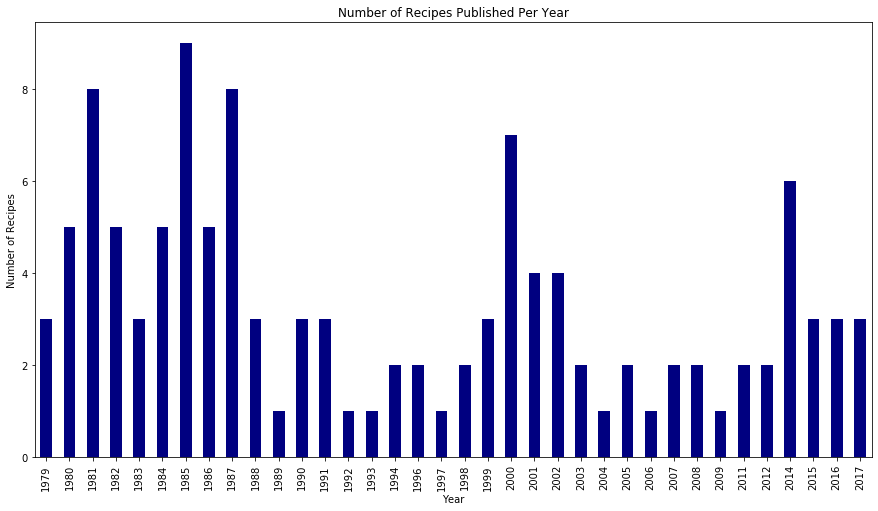

In [94]:
listofin=['sugarloaf']

X = carrusel_df[['date','recipe_name','ingredient_en']]

X = X[X['ingredient_en'].isin(listofin)]
X = X.drop_duplicates()
X['date'] = pd.to_datetime(X['date'], errors='coerce')
X['yearly'] = X['date'].dt.year
fig, ax = plt.subplots(figsize=(15, 8))
#Label axis
#Plot
X[['yearly','recipe_name']].groupby(['yearly']).agg(['count']).plot.bar(
    ax=ax, legend=False, title="Number of Recipes Published Per Year", color = 'navy'
)
plt.xlabel("Year")
plt.ylabel("Number of Recipes")

**4.**  Create Networks

In [95]:
#load NODE data as lists. The symbols such as (' , etc were concatenated on 

nodesrecipes = list(carrusel_df.recipe_name.unique())
nodesingredients = list(carrusel_df.ingredient_en.unique())
edgesrecipeingredient = list(zip(carrusel_df.recipe_name, carrusel_df.ingredient_en))
ingredient_category = list(zip(carrusel_df.ingredient_en,carrusel_df.category))

#check some values if needed
#print(nodesrecipes[0:5])
#print(nodesingredients[0:5])
#print(edgesrecipeingredient[0:5])


#Load Edge data --that is the connections between nodes


#we want these statistics on the output
print("Number of Recipes:",len(nodesrecipes))
print("Number of Ingredients:",len(nodesingredients))


#checks that there are no ingredients present in both nodesrecipes and nodeingredients
for x in nodesrecipes:
  if x in nodesingredients:
    print("WARNING: The following ingredients are listes as ingredients AND recipes: ",x)    

Number of Recipes: 5981
Number of Ingredients: 557


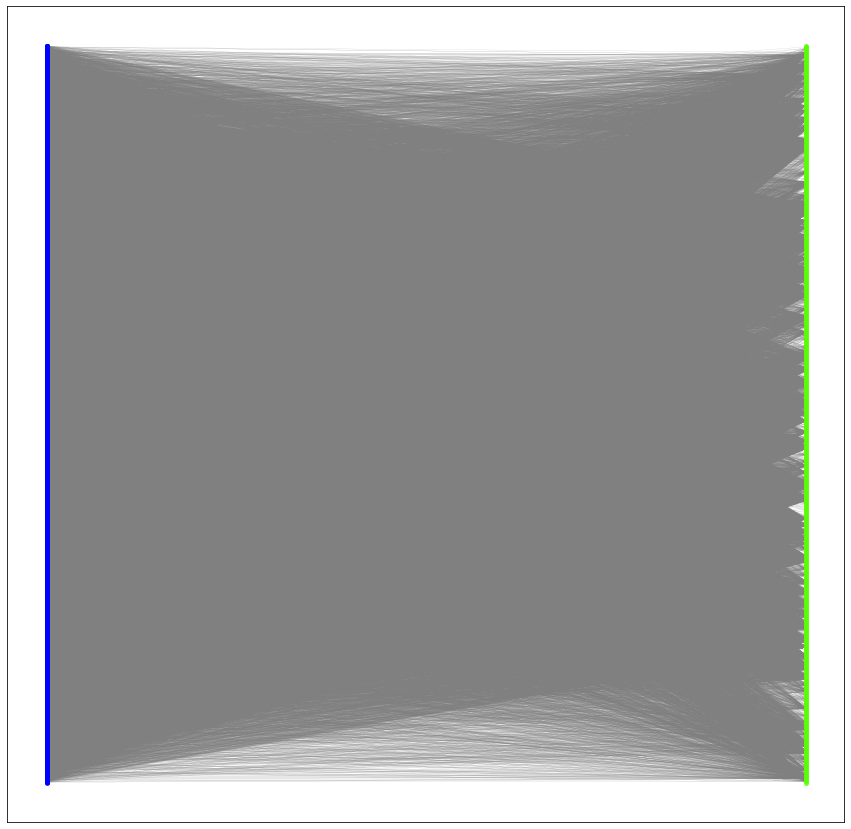

In [96]:
import networkx as nx
#from networkx.algorithms import bipartite

#here we are creating an empty graph (network)
B = nx.Graph()

#we are adding the nodes, which we loaded on the previous step. 
#note how we add the bipartite nodes below
B.add_nodes_from(nodesrecipes, bipartite=0)
B.add_nodes_from(nodesingredients, bipartite=1)

plt.figure(figsize=(15,15))


#we add the edges
B.add_edges_from(edgesrecipeingredient)

top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)

nx.draw_networkx_nodes(B,pos,
                       nodelist=nodesrecipes,
                       node_color='b',
                       node_size=15,
                   alpha=0.8)

# Let's visualize the network
nx.draw_networkx_nodes(B,pos,
                       nodelist=nodesingredients,
                       node_color='#5AFE03',
                       node_size=15,
                   alpha=0.8)

# edges
nx.draw_networkx_edges(B,pos,edge_color='gray', width = 0.1)



#labels
#nx.draw_networkx_labels(B,pos,nodelist=nodesrecipes,font_size=15)
#nx.draw_networkx_labels(B,pos,nodelist=nodesingredients,font_size=0.0000001)


#plt.show()

#plt.savefig("bipartitecumulative.jpg")
#delete the # below if you want to save the plot
#files.download("bipartitecumulative.jpg") 

**5** Let's project the two mode network into a one mode network. We are interested in finding how ingredients relate to one another based on the recipes they are present in

# 1 Sweeteeners

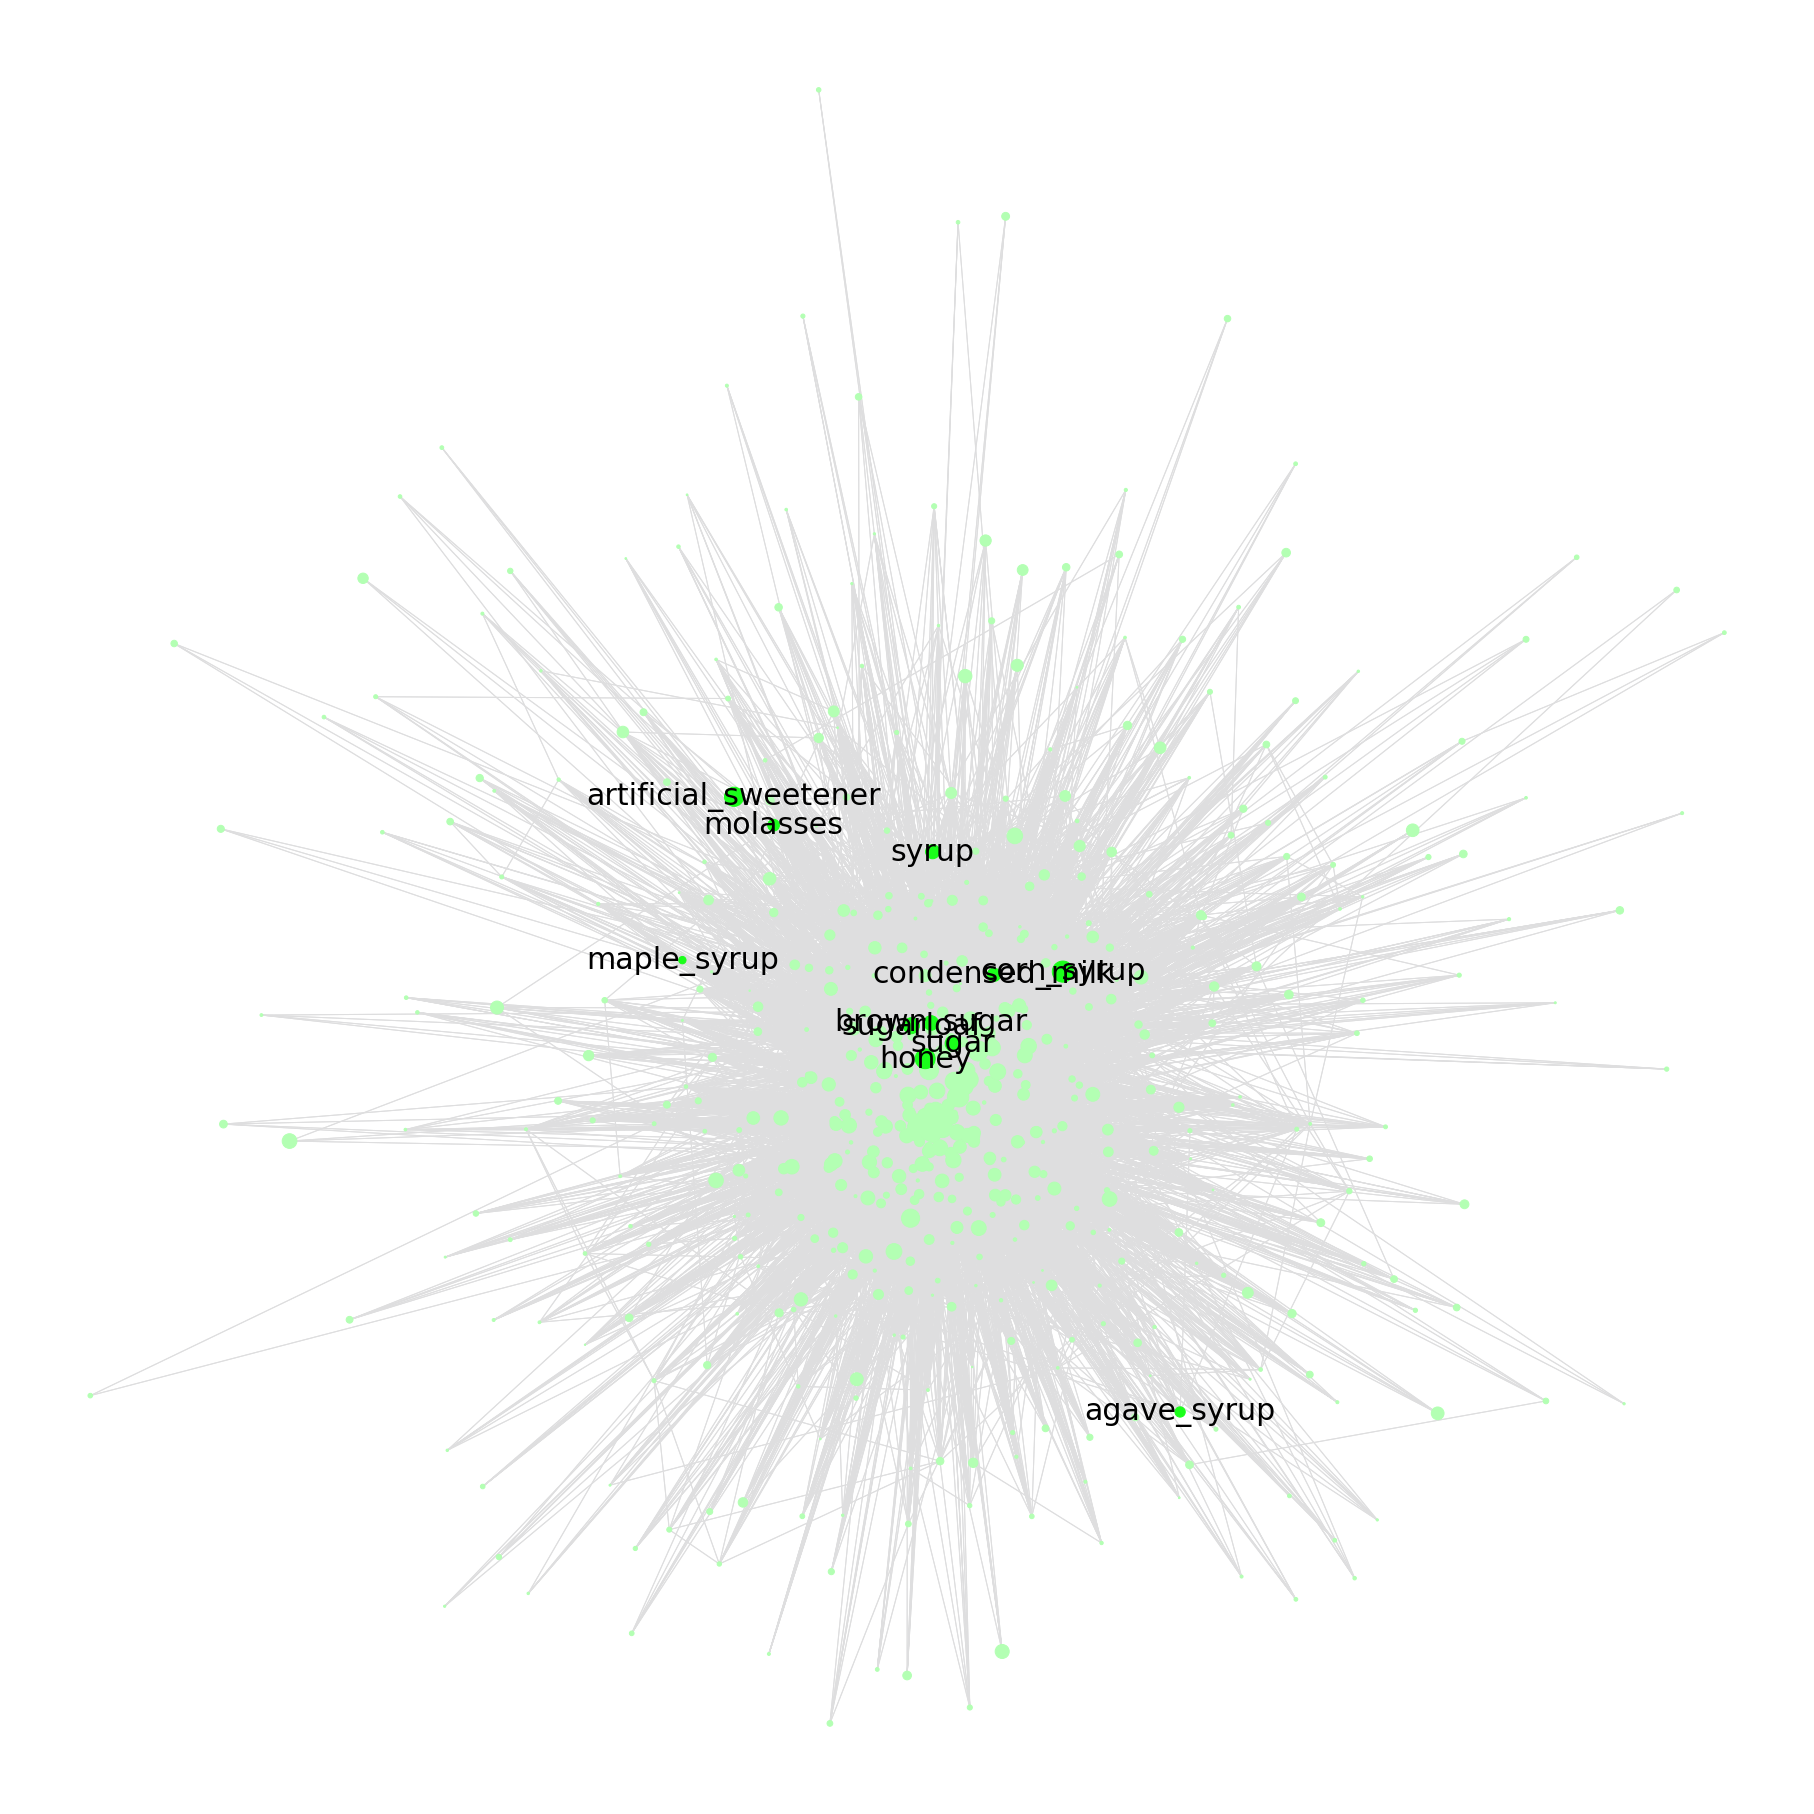

In [97]:
#Get list of sweeteners and non sweeteners to color 
sweeteners_tolist = list(zip(carrusel_df.sweetener, carrusel_df.ingredient_en))

#iterate get both
sweeteners = [(v) for u, v in sweeteners_tolist if u == 1]
non_sweeteners = [(v) for u, v in sweeteners_tolist if u == 0]

#make unique both
sweeteners = pd.DataFrame(sweeteners, columns =['ingredients']) 
non_sweeteners = pd.DataFrame(non_sweeteners, columns =['ingredients']) 

#get as list
sweeteners = list(sweeteners.ingredients.unique())
non_sweeteners = list(non_sweeteners.ingredients.unique())


#projection into ingrediento nodes
G = bipartite.weighted_projected_graph(B,nodesingredients)
#get the node degrees
d = dict(G.degree)

plt.figure(figsize=(25,25))

pos = nx.spring_layout(G)
#pos = nx.kamada_kawai_layout(G)

#DRAW
#sweeteners



#Now only add labels to the nodes you require (the hubs in my case)

labels = {}    
for node in G.nodes():
    if node in sweeteners:
        #set the node name as the key and the label as its value 
        labels[node] = node

#non sweeteners
nx.draw(G, pos,
        nodelist=non_sweeteners, 
        with_labels=False, 
        edge_color = '#DEDEDF',
        node_color= '#b3ffb3',
        node_size=[v * 1 for v in d.values()])

#sweeteners
nx.draw(G, pos,
        nodelist=sweeteners, 
        with_labels=False, 
        edge_color = '#DEDEDF', 
        node_color= '#1aff1a',
        node_size=[v * 1 for v in d.values()])

#add labels
nx.draw_networkx_labels(G,pos,labels,font_size=30, font_color = 'k')


#plt.savefig('sweetnerssandnetworksgraph.svg')
#plt.savefig('sweetnerssandnetworksgraph.jpeg', dpi = 300)
#plt.savefig('sweetnerssandnetworksgraphtransparent.jpeg', transparent = True, dpi = 300)

plt.show()


#delete the # below if you want to save the plot

#print(nx.degree_histogram(G))

Analysis Year by Year (either wirth sliding window or cumulative)

In [98]:
##YEARLY ANALYSIS
    
def stat_of_interest(statdict,ingredient):
    if ingredient in statdict:
        result = statdict[ingredient]
    if ingredient not in statdict:
        result = 1 + np.nan
    return result    
    
#define variables
year_stat = []

sugar_stat = []
brown_sugar_stat = []
sugarloaf_stat = []
condensed_milk_stat = []
syrup_stat = []
corn_syrup_stat = []
honey_stat = []
artificial_sweetener_stat = []
molasses_stat = []
maple_syrup_stat = []
agave_syrup_stat = []

#get statistic of interest (YEAR)
for x in range(1977, 2018, 1):
    temp_df = (carrusel_df.loc[(carrusel_df['year'] <= x)])
    #carrusel_df.loc[(carrusel_df['year'] == x)]

    nodesrecipes_temp = list(temp_df.recipe_name.unique())
    nodesingredients_temp = list(temp_df.ingredient_en.unique())
    edgesrecipeingredient_temp = list(zip(temp_df.recipe_name, temp_df.ingredient_en))
  #create Temporal Bipartite Network
  #here we are creating an empty graph (network)
    B_temp = nx.Graph()
  #we are adding the nodes, which we loaded on the previous step. 
  #note how we add the bipartite nodes below
    B_temp.add_nodes_from(nodesrecipes_temp, bipartite=0)
    B_temp.add_nodes_from(nodesingredients_temp, bipartite=1)
  #add edges
    B_temp.add_edges_from(edgesrecipeingredient_temp)
    G_temp = bipartite.weighted_projected_graph(B_temp,nodesingredients_temp)
    
  #get the statistic of interest !
    stats_result = dict(nx.degree_centrality(G_temp))
    #stats_result = dict(nx.pagerank(G_temp)) 
    
  #populate variables
    year_stat.append(x)
    
    sugar_stat.append(stat_of_interest(stats_result,'sugar'))
    brown_sugar_stat.append(stat_of_interest(stats_result,'brown_sugar'))
    sugarloaf_stat.append(stat_of_interest(stats_result,'sugarloaf'))
    condensed_milk_stat.append(stat_of_interest(stats_result,'condensed_milk'))
    syrup_stat.append(stat_of_interest(stats_result,'syrup'))
    corn_syrup_stat.append(stat_of_interest(stats_result,'corn_syrup'))
    honey_stat.append(stat_of_interest(stats_result,'honey'))
    artificial_sweetener_stat.append(stat_of_interest(stats_result,'artificial_sweetener'))
    molasses_stat.append(stat_of_interest(stats_result,'molasses'))
    maple_syrup_stat.append(stat_of_interest(stats_result,'maple_syrup'))
    agave_syrup_stat.append(stat_of_interest(stats_result,'agave_syrup'))
    print(str(x-5)+" to "+str(x))

1972 to 1977
1973 to 1978
1974 to 1979
1975 to 1980
1976 to 1981
1977 to 1982
1978 to 1983
1979 to 1984
1980 to 1985
1981 to 1986
1982 to 1987
1983 to 1988
1984 to 1989
1985 to 1990
1986 to 1991
1987 to 1992
1988 to 1993
1989 to 1994
1990 to 1995
1991 to 1996
1992 to 1997
1993 to 1998
1994 to 1999
1995 to 2000
1996 to 2001
1997 to 2002
1998 to 2003
1999 to 2004
2000 to 2005
2001 to 2006
2002 to 2007
2003 to 2008
2004 to 2009
2005 to 2010
2006 to 2011
2007 to 2012
2008 to 2013
2009 to 2014
2010 to 2015
2011 to 2016
2012 to 2017


                          1977      1978      1979      1980      1981  \
sugar                 0.325301  0.354839  0.468293  0.501916  0.567376   
brown_sugar                NaN  0.072581  0.043902  0.034483  0.120567   
sugarloaf                  NaN       NaN  0.078049  0.137931  0.202128   
condensed_milk             NaN       NaN  0.019512  0.084291  0.099291   
syrup                      NaN       NaN  0.019512  0.015326  0.014184   
corn_syrup                 NaN       NaN  0.048780  0.038314  0.035461   
honey                      NaN       NaN  0.019512  0.015326  0.014184   
artificial_sweetener       NaN       NaN       NaN  0.011494  0.010638   
molasses                   NaN       NaN       NaN  0.003831  0.056738   
maple_syrup                NaN       NaN       NaN       NaN       NaN   
agave_syrup                NaN       NaN       NaN       NaN       NaN   

                          1982      1983      1984      1985      1986  ...  \
sugar                 0.600000  

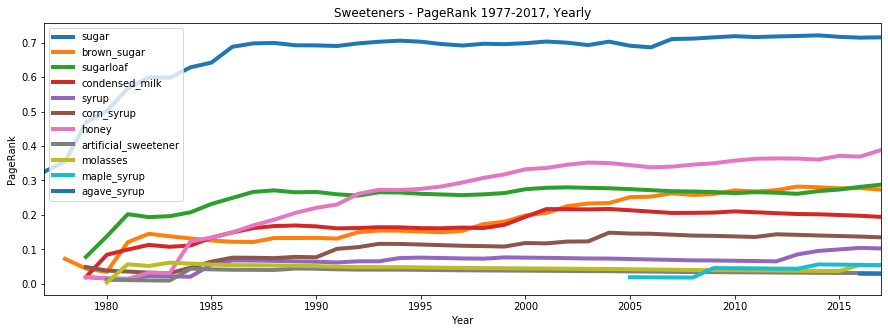

In [99]:
sweeteners_stats = [sugar_stat, brown_sugar_stat, sugarloaf_stat, condensed_milk_stat, syrup_stat, corn_syrup_stat, honey_stat, 
         artificial_sweetener_stat, molasses_stat, maple_syrup_stat, agave_syrup_stat]

df_ss=pd.DataFrame(sweeteners_stats, columns = year_stat, index = sweeteners)
#print(df_ss)
print(df_ss)

# plt.plot(num_people_v_random_BA, num_people_s_random_BA, color='b')

sweeteners_stats = [sugar_stat, brown_sugar_stat, sugarloaf_stat, condensed_milk_stat, syrup_stat, corn_syrup_stat, honey_stat, 
         artificial_sweetener_stat, molasses_stat, maple_syrup_stat, agave_syrup_stat]

plt.figure(figsize=(15,5))

for x in sweeteners_stats:
    plt.plot(year_stat, x, linewidth=4, alpha=1)
    
plt.legend(sweeteners, loc = 'upper left', frameon=True)
plt.xlabel('Year')
plt.ylabel('PageRank')
plt.title('Sweeteners - PageRank 1977-2017, Yearly')
    
plt.xlim(1977,2017)

#len(sweeteners_stats)

plt.savefig('sweetnerssandnetworksgraph1y.svg')
plt.savefig('sweetnerssandnetworksgraph1y.jpeg', dpi = 300)
plt.savefig('sweetnerssandnetworksgraphtransparent1y.jpeg', transparent = True, dpi = 300)

plt.show()

Analysis Month to month. Either with sliding window or cumulative

In [100]:
##Monthly ANALYSIS

#define functions
#def stat_of_interest(statdict,ingredient):
    #iterate over vaccinated people to get their neighbors
#    if ingredient in statdict:
#        result = statdict[ingredient] / statdict[max(statdict, key=statdict.get)]
#    if ingredient not in statdict:
#        result = 1 + np.nan
#    return result
    
def stat_of_interest(statdict,ingredient):
    #iterate over vaccinated people to get their neighbors
    if ingredient in statdict:
        result = statdict[ingredient]
    if ingredient not in statdict:
        result = 1 + np.nan
    return result    
    
#define variables
year_stat = []

sugar_stat = []
brown_sugar_stat = []
sugarloaf_stat = []
condensed_milk_stat = []
syrup_stat = []
corn_syrup_stat = []
honey_stat = []
artificial_sweetener_stat = []
molasses_stat = []
maple_syrup_stat = []
agave_syrup_stat = []

#get statistic of interest (YEAR)
for x in range(1, 13, 1):
    #WARNING: Be careful with these parameters: change according to decade and/or period of study!!!!
    temp_df = carrusel_df.loc[(carrusel_df['month'] == x) & (carrusel_df['year'] >= 1977) & (carrusel_df['year'] <2018)]
    #(carrusel_df.loc[(carrusel_df['year'] < (x + 5)) & (carrusel_df['year'] >= x)])
    nodesrecipes_temp = list(temp_df.recipe_name.unique())
    nodesingredients_temp = list(temp_df.ingredient_en.unique())
    edgesrecipeingredient_temp = list(zip(temp_df.recipe_name, temp_df.ingredient_en))
  #create Temporal Bipartite Network
  #here we are creating an empty graph (network)
    B_temp = nx.Graph()
  #we are adding the nodes, which we loaded on the previous step. 
  #note how we add the bipartite nodes below
    B_temp.add_nodes_from(nodesrecipes_temp, bipartite=0)
    B_temp.add_nodes_from(nodesingredients_temp, bipartite=1)
  #add edges
    B_temp.add_edges_from(edgesrecipeingredient_temp)
    G_temp = bipartite.weighted_projected_graph(B_temp,nodesingredients_temp)
    
  #get the statistic of interest !
    #stats_result = dict(nx.degree_centrality(G_temp))
    stats_result = dict(nx.pagerank(G_temp)) 
    
  #populate variables
    year_stat.append(x)
    
    sugar_stat.append(stat_of_interest(stats_result,'sugar'))
    brown_sugar_stat.append(stat_of_interest(stats_result,'brown_sugar'))
    sugarloaf_stat.append(stat_of_interest(stats_result,'sugarloaf'))
    condensed_milk_stat.append(stat_of_interest(stats_result,'condensed_milk'))
    syrup_stat.append(stat_of_interest(stats_result,'syrup'))
    corn_syrup_stat.append(stat_of_interest(stats_result,'corn_syrup'))
    honey_stat.append(stat_of_interest(stats_result,'honey'))
    artificial_sweetener_stat.append(stat_of_interest(stats_result,'artificial_sweetener'))
    molasses_stat.append(stat_of_interest(stats_result,'molasses'))
    maple_syrup_stat.append(stat_of_interest(stats_result,'maple_syrup'))
    agave_syrup_stat.append(stat_of_interest(stats_result,'agave_syrup'))

                            1         2         3         4         5   \
sugar                 0.021415  0.020083  0.015884  0.021866  0.024346   
brown_sugar           0.001188  0.001916  0.000749  0.002320  0.002522   
sugarloaf             0.002806  0.003083  0.001108  0.002417  0.002552   
condensed_milk        0.001084  0.001468  0.001824  0.002663  0.003240   
syrup                      NaN  0.000845  0.001511       NaN  0.000875   
corn_syrup            0.000756  0.001017  0.001027       NaN  0.001704   
honey                 0.002636  0.001548  0.001561  0.003714  0.003226   
artificial_sweetener       NaN  0.000609       NaN  0.000827       NaN   
molasses                   NaN       NaN  0.000718       NaN       NaN   
maple_syrup                NaN       NaN       NaN       NaN  0.000867   
agave_syrup                NaN       NaN       NaN       NaN       NaN   

                            6         7         8         9         10  \
sugar                 0.024257  0.019

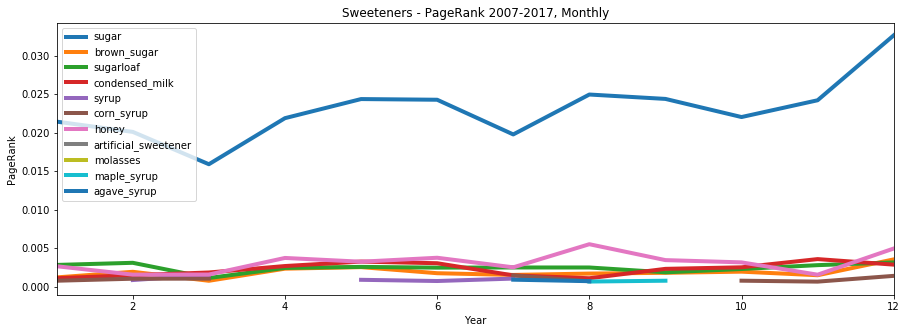

In [101]:
sweeteners_stats = [sugar_stat, brown_sugar_stat, sugarloaf_stat, condensed_milk_stat, syrup_stat, corn_syrup_stat, honey_stat, 
         artificial_sweetener_stat, molasses_stat, maple_syrup_stat, agave_syrup_stat]

df_ss=pd.DataFrame(sweeteners_stats, columns = year_stat, index = sweeteners)
#print(df_ss)
print(df_ss)

# plt.plot(num_people_v_random_BA, num_people_s_random_BA, color='b')

sweeteners_stats = [sugar_stat, brown_sugar_stat, sugarloaf_stat, condensed_milk_stat, syrup_stat, corn_syrup_stat, honey_stat, 
         artificial_sweetener_stat, molasses_stat, maple_syrup_stat, agave_syrup_stat]

plt.figure(figsize=(15,5))

for x in sweeteners_stats:
    plt.plot(year_stat, x, linewidth=4, alpha=1)
    
plt.legend(sweeteners, loc = 'upper left', frameon=True)
plt.xlabel('Year')
plt.ylabel('PageRank')
plt.title('Sweeteners - PageRank 2007-2017, Monthly')
plt.xlim(1,12)

#Be careful with these plot titles: change according to decade and/or period of study
plt.savefig('sweetnerssandnetworksgraphm07_17.svg')
plt.savefig('sweetnerssandnetworksgraph1m07_17.jpeg', dpi = 300)
plt.savefig('sweetnerssandnetworksgraphtransparent1m07_17.jpeg', transparent = True, dpi = 300)


plt.show()
#len(sweeteners_stats)

# 2 Animal Proteins

In [102]:
#load NODE data as lists. The symbols such as (' , etc were concatenated on 

nodesrecipes = list(carrusel_df.recipe_name.unique())
nodesingredients = list(carrusel_df.animal_category.unique())
edgesrecipeingredient = list(zip(carrusel_df.recipe_name, carrusel_df.animal_category))



#check some values if needed
#print(nodesrecipes[0:5])
#print(nodesingredients[0:5])
#print(edgesrecipeingredient[0:5])


#Load Edge data --that is the connections between nodes


#we want these statistics on the output
print("Number of Recipes:",len(nodesrecipes))
print("Number of Ingredients:",len(nodesingredients))


#checks that there are no ingredients present in both nodesrecipes and nodeingredients
for x in nodesrecipes:
  if x in nodesingredients:
    print("WARNING: The following ingredients are listes as ingredients AND recipes: ",x)    

Number of Recipes: 5981
Number of Ingredients: 514


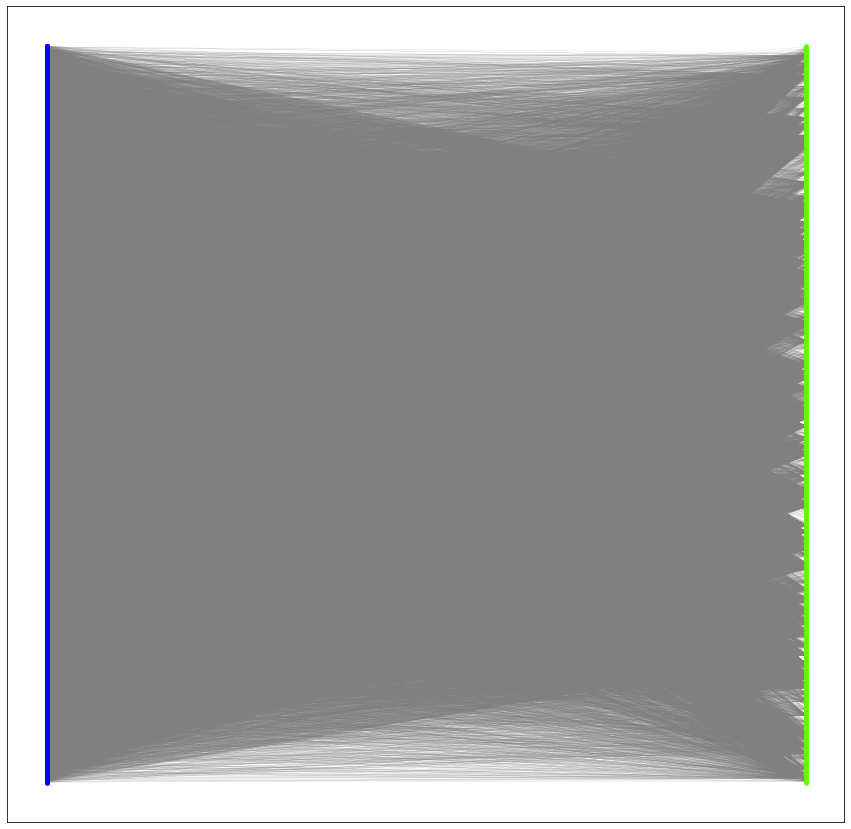

In [103]:
#here we are creating an empty graph (network)
B = nx.Graph()

#we are adding the nodes, which we loaded on the previous step. 
#note how we add the bipartite nodes below
B.add_nodes_from(nodesrecipes, bipartite=0)
B.add_nodes_from(nodesingredients, bipartite=1)

plt.figure(figsize=(15,15))


#we add the edges
B.add_edges_from(edgesrecipeingredient)

top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)

nx.draw_networkx_nodes(B,pos,
                       nodelist=nodesrecipes,
                       node_color='b',
                       node_size=15,
                   alpha=0.8)

# Let's visualize the network
nx.draw_networkx_nodes(B,pos,
                       nodelist=nodesingredients,
                       node_color='#5AFE03',
                       node_size=15,
                   alpha=0.8)

# edges
nx.draw_networkx_edges(B,pos,edge_color='gray', width = 0.1)



#labels
#nx.draw_networkx_labels(B,pos,nodelist=nodesrecipes,font_size=15)
#nx.draw_networkx_labels(B,pos,nodelist=nodesingredients,font_size=0.0000001)


#plt.show()

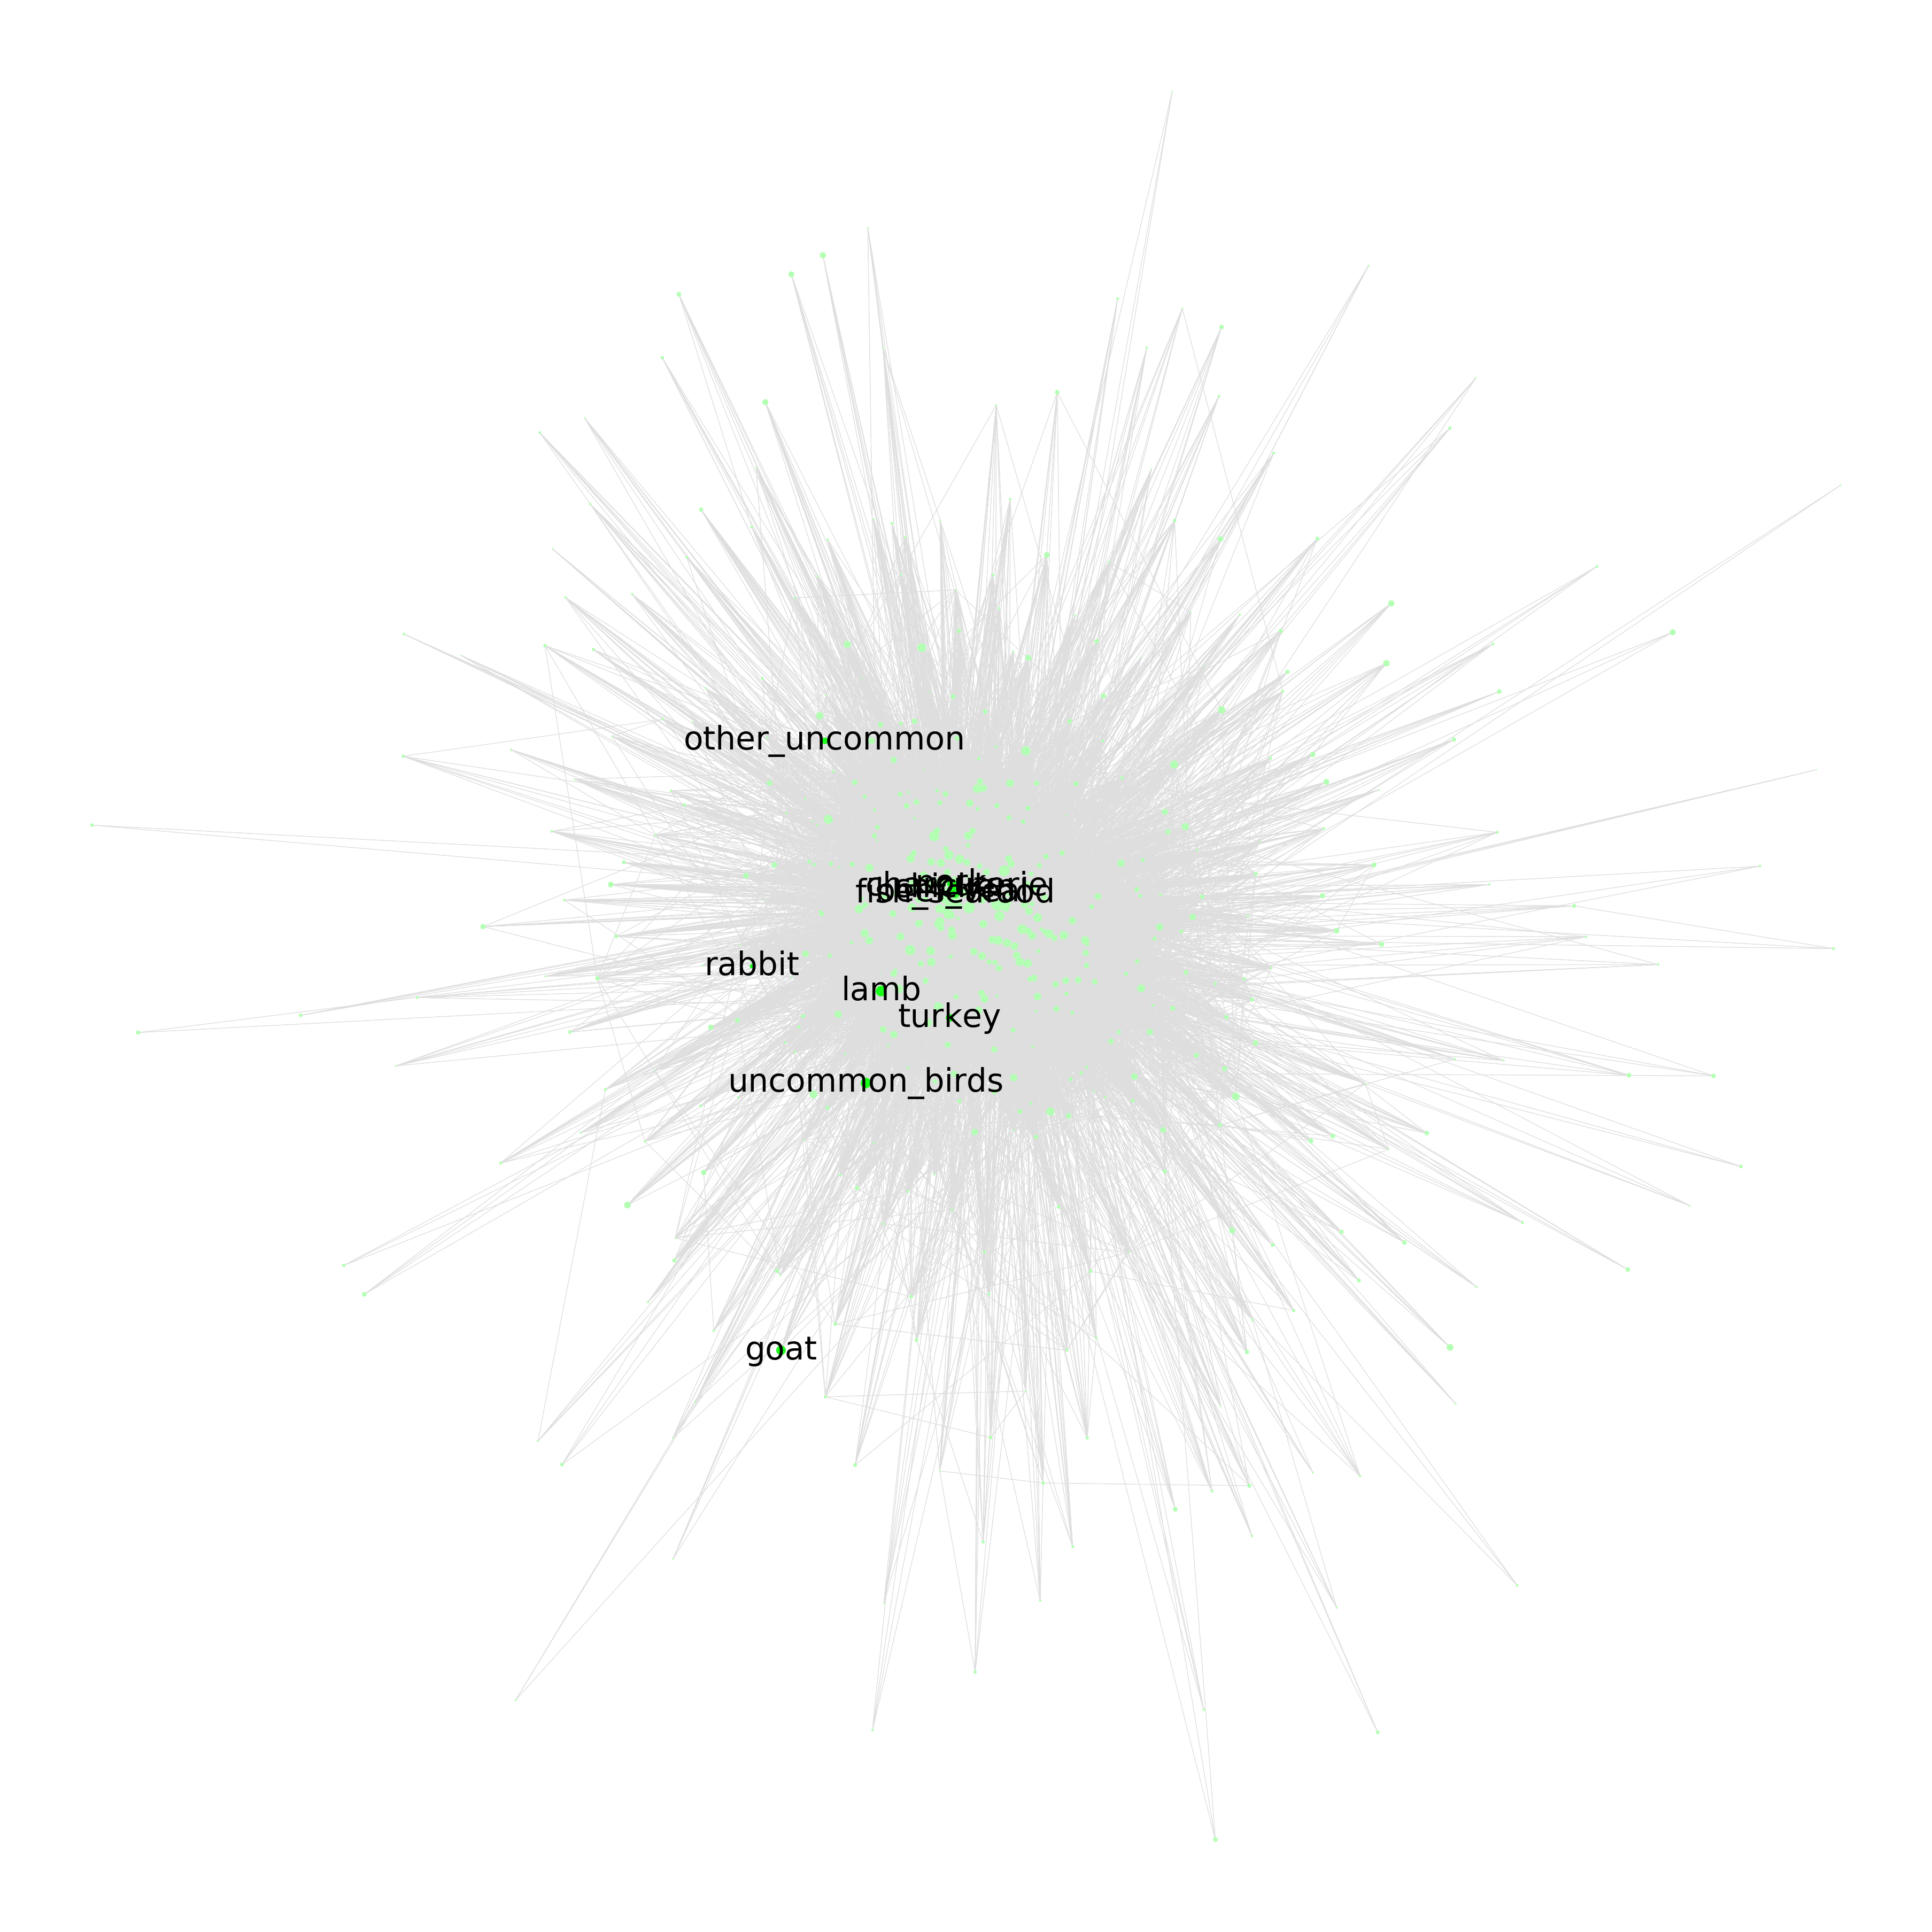

In [104]:


#plt.savefig("bipartitecumulative.jpg")
#delete the # below if you want to save the plot
#files.download("bipartitecumulative.jpg") 


#Get list of sweeteners and non sweeteners to color 
ap_tolist = list(zip(carrusel_df.animal_meat_protein, carrusel_df.animal_category))

#iterate get both
ap = [(v) for u, v in ap_tolist if u == 1]
non_ap = [(v) for u, v in ap_tolist if u == 0]

#make unique both
ap = pd.DataFrame(ap, columns =['animal_category']) 
non_ap = pd.DataFrame(non_ap, columns =['animal_category']) 

#get as list
ap = list(ap.animal_category.unique())
non_ap = list(non_ap.animal_category.unique())


#projection into ingrediento nodes
G = bipartite.weighted_projected_graph(B,nodesingredients)
#get the node degrees
d = dict(G.degree)

plt.figure(figsize=(50,50))

pos = nx.spring_layout(G)
#pos = nx.kamada_kawai_layout(G)

#DRAW
#sweeteners



#Now only add labels to the nodes you require (the hubs in my case)

labels = {}    
for node in G.nodes():
    if node in ap:
        #set the node name as the key and the label as its value 
        labels[node] = node

#non sweeteners
nx.draw(G, pos,
        nodelist=non_ap, 
        with_labels=False, 
        edge_color = '#DEDEDF',
        node_color= '#b3ffb3',
        node_size=[v * 1 for v in d.values()])

#sweeteners
nx.draw(G, pos,
        nodelist=ap, 
        with_labels=False, 
        edge_color = '#DEDEDF', 
        node_color= '#1aff1a',
        node_size=[v * 1 for v in d.values()])

#add labels
nx.draw_networkx_labels(G,pos,labels,font_size=60, font_color = 'k')


#plt.savefig('sweetnerssandnetworksgraph.svg')
#plt.savefig('sweetnerssandnetworksgraph.jpeg', dpi = 300)
#plt.savefig('sweetnerssandnetworksgraphtransparent.jpeg', transparent = True, dpi = 300)

plt.show()


#delete the # below if you want to save the plot

#print(nx.degree_histogram(G))

In [105]:
##YEARLY ANALYSIS
    
def stat_of_interest(statdict,ingredient):
    if ingredient in statdict:
        result = statdict[ingredient]
    if ingredient not in statdict:
        result = 1 + np.nan
    return result    
    
#define variables
year_stat = []

fish_seafood_stat = []
chicken_stat = []
beef_veal_stat = []
pork_stat = []
turkey_stat = []
charcuterie_stat = []
lamb_stat = []
uncommon_birds_stat = []
other_uncommon_stat = []
rabbit_stat = []
goat_stat = []


#get statistic of interest (YEAR)
for x in range(1977, 2017, 1):
    temp_df = (carrusel_df.loc[(carrusel_df['year'] <= x)])
    #carrusel_df.loc[(carrusel_df['year'] == x)]

    nodesrecipes_temp = list(temp_df.recipe_name.unique())
    nodesingredients_temp = list(temp_df.animal_category.unique())
    edgesrecipeingredient_temp = list(zip(temp_df.recipe_name, temp_df.animal_category))


  #create Temporal Bipartite Network
  #here we are creating an empty graph (network)
    B_temp = nx.Graph()
  #we are adding the nodes, which we loaded on the previous step. 
  #note how we add the bipartite nodes below
    B_temp.add_nodes_from(nodesrecipes_temp, bipartite=0)
    B_temp.add_nodes_from(nodesingredients_temp, bipartite=1)
  #add edges
    B_temp.add_edges_from(edgesrecipeingredient_temp)
    G_temp = bipartite.weighted_projected_graph(B_temp,nodesingredients_temp)
    
  #get the statistic of interest !
    #stats_result = dict(nx.degree_centrality(G_temp))
    stats_result = dict(nx.pagerank(G_temp)) 
    
  #populate variables
    year_stat.append(x)

    fish_seafood_stat.append(stat_of_interest(stats_result,'fish_seafood'))
    chicken_stat.append(stat_of_interest(stats_result,'chicken'))
    beef_veal_stat.append(stat_of_interest(stats_result,'beef_veal'))
    pork_stat.append(stat_of_interest(stats_result,'pork'))
    turkey_stat.append(stat_of_interest(stats_result,'turkey'))
    charcuterie_stat.append(stat_of_interest(stats_result,'charcuterie'))
    lamb_stat.append(stat_of_interest(stats_result,'lamb'))
    other_uncommon_stat.append(stat_of_interest(stats_result,'other_uncommon'))
    uncommon_birds_stat.append(stat_of_interest(stats_result,'uncommon_birds'))
    rabbit_stat.append(stat_of_interest(stats_result,'rabbit'))
    goat_stat.append(stat_of_interest(stats_result,'goat'))
    
    
    print(str(x-5) + "--" +  str(x) )

1972--1977
1973--1978
1974--1979
1975--1980
1976--1981
1977--1982
1978--1983
1979--1984
1980--1985
1981--1986
1982--1987
1983--1988
1984--1989
1985--1990
1986--1991
1987--1992
1988--1993
1989--1994
1990--1995
1991--1996
1992--1997
1993--1998
1994--1999
1995--2000
1996--2001
1997--2002
1998--2003
1999--2004
2000--2005
2001--2006
2002--2007
2003--2008
2004--2009
2005--2010
2006--2011
2007--2012
2008--2013
2009--2014
2010--2015
2011--2016


                    1977      1978      1979      1980      1981      1982  \
fish_seafood    0.021625  0.026474  0.015979  0.014087  0.013458  0.013119   
chicken         0.013908  0.011498  0.012964  0.012191  0.011112  0.010086   
beef_veal       0.016695  0.020819  0.017546  0.019038  0.018053  0.015900   
pork            0.015786  0.020401  0.013823  0.012008  0.011324  0.010038   
turkey          0.006247  0.005562  0.003459  0.002412  0.002114  0.001905   
charcuterie          NaN  0.003203  0.005586  0.004826  0.006103  0.007569   
lamb                 NaN       NaN  0.001263  0.001615  0.001422  0.001636   
uncommon_birds       NaN       NaN  0.001263  0.001194  0.001165  0.000980   
other_uncommon       NaN       NaN       NaN  0.000836  0.000924  0.000954   
rabbit               NaN       NaN       NaN       NaN       NaN       NaN   
goat                 NaN       NaN       NaN       NaN       NaN       NaN   

                    1983      1984      1985      1986  ...    

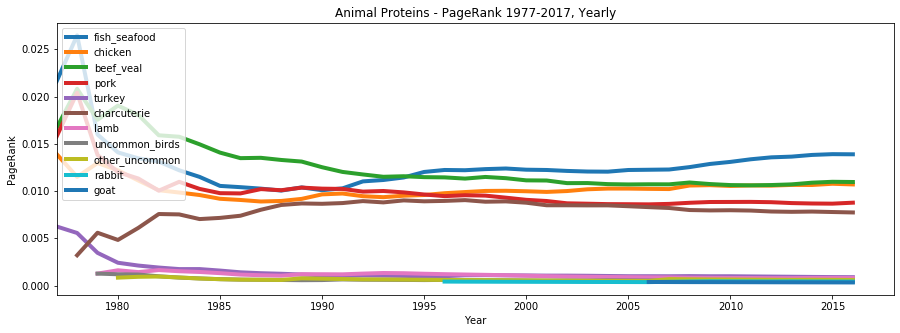

In [106]:
ap_stats = [fish_seafood_stat,chicken_stat,beef_veal_stat,pork_stat,turkey_stat,charcuterie_stat,lamb_stat,uncommon_birds_stat, other_uncommon_stat,rabbit_stat,goat_stat]

df_ss=pd.DataFrame(ap_stats, columns = year_stat, index = ap)
#print(df_ss)
print(df_ss)

# plt.plot(num_people_v_random_BA, num_people_s_random_BA, color='b')


ap_stats = [fish_seafood_stat,chicken_stat,beef_veal_stat,pork_stat,turkey_stat,charcuterie_stat,lamb_stat,uncommon_birds_stat, other_uncommon_stat,rabbit_stat,goat_stat]


plt.figure(figsize=(15,5))

for x in ap_stats:
    plt.plot(year_stat, x, linewidth=4, alpha=1)
    
plt.legend(ap, loc = 'upper left', frameon=True)
plt.xlabel('Year')
plt.ylabel('PageRank')
plt.title('Animal Proteins - PageRank 1977-2017, Yearly')
    
plt.xlim(1977,2018)

#len(sweeteners_stats)


plt.show()

In [122]:
##MONTHLY ANALYSIS
    
def stat_of_interest(statdict,ingredient):
    if ingredient in statdict:
        result = statdict[ingredient]
    if ingredient not in statdict:
        result = 1 + np.nan
    return result    
    
#define variables
year_stat = []

fish_seafood_stat = []
chicken_stat = []
beef_veal_stat = []
pork_stat = []
turkey_stat = []
charcuterie_stat = []
lamb_stat = []
uncommon_birds_stat = []
other_uncommon_stat = []
rabbit_stat = []
goat_stat = []


#get statistic of interest (YEAR)
for x in range(1, 13, 1):
    #WARNING: Be careful with these parameters: change according to decade and/or period of study!!!!
    temp_df = carrusel_df.loc[(carrusel_df['month'] == x) & (carrusel_df['year'] >= 2007) & (carrusel_df['year'] <=2017)]
    #(carrusel_df.loc[(carrusel_df['year'] < (x + 5)) & (carrusel_df['year'] >= x)])

    nodesrecipes_temp = list(temp_df.recipe_name.unique())
    nodesingredients_temp = list(temp_df.animal_category.unique())
    edgesrecipeingredient_temp = list(zip(temp_df.recipe_name, temp_df.animal_category))


  #create Temporal Bipartite Network
  #here we are creating an empty graph (network)
    B_temp = nx.Graph()
  #we are adding the nodes, which we loaded on the previous step. 
  #note how we add the bipartite nodes below
    B_temp.add_nodes_from(nodesrecipes_temp, bipartite=0)
    B_temp.add_nodes_from(nodesingredients_temp, bipartite=1)
  #add edges
    B_temp.add_edges_from(edgesrecipeingredient_temp)
    G_temp = bipartite.weighted_projected_graph(B_temp,nodesingredients_temp)
    
  #get the statistic of interest !
    stats_result = dict(nx.degree_centrality(G_temp))
    #stats_result = dict(nx.pagerank(G_temp)) 
    
  #populate variables
    year_stat.append(x)

    fish_seafood_stat.append(stat_of_interest(stats_result,'fish_seafood'))
    chicken_stat.append(stat_of_interest(stats_result,'chicken'))
    beef_veal_stat.append(stat_of_interest(stats_result,'beef_veal'))
    pork_stat.append(stat_of_interest(stats_result,'pork'))
    turkey_stat.append(stat_of_interest(stats_result,'turkey'))
    charcuterie_stat.append(stat_of_interest(stats_result,'charcuterie'))
    lamb_stat.append(stat_of_interest(stats_result,'lamb'))
    other_uncommon_stat.append(stat_of_interest(stats_result,'other_uncommon'))
    uncommon_birds_stat.append(stat_of_interest(stats_result,'uncommon_birds'))
    rabbit_stat.append(stat_of_interest(stats_result,'rabbit'))
    goat_stat.append(stat_of_interest(stats_result,'goat'))
    
    


                      1         2         3         4         5         6   \
fish_seafood    0.323944  0.448864  0.426829  0.500000  0.350962  0.338542   
chicken         0.373239  0.255682  0.390244  0.295455  0.331731  0.390625   
beef_veal       0.246479  0.340909  0.243902  0.329545  0.245192  0.473958   
pork            0.267606  0.204545  0.219512  0.295455  0.307692  0.328125   
turkey               NaN       NaN       NaN       NaN       NaN       NaN   
charcuterie     0.190141  0.102273  0.195122  0.278409  0.177885  0.192708   
lamb                 NaN  0.045455  0.036585       NaN       NaN  0.072917   
uncommon_birds       NaN       NaN       NaN       NaN  0.052885       NaN   
other_uncommon       NaN       NaN       NaN  0.056818       NaN  0.104167   
rabbit               NaN  0.039773       NaN       NaN       NaN  0.119792   
goat                 NaN       NaN       NaN       NaN       NaN       NaN   

                      7         8         9         10        1

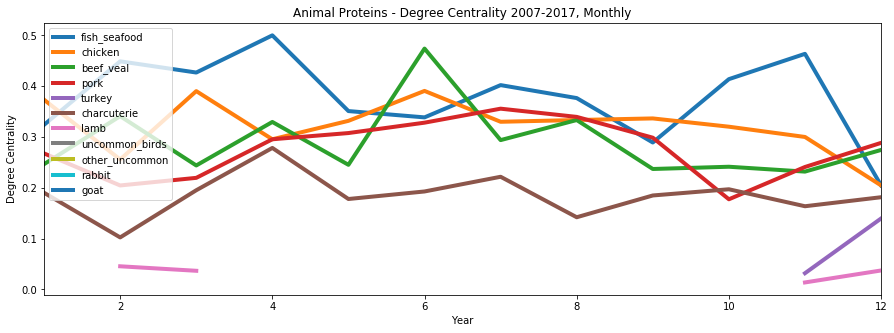

In [123]:
ap_stats = [fish_seafood_stat,chicken_stat,beef_veal_stat,pork_stat,turkey_stat,charcuterie_stat,lamb_stat,uncommon_birds_stat, other_uncommon_stat,rabbit_stat,goat_stat]

df_ss=pd.DataFrame(ap_stats, columns = year_stat, index = ap)
#print(df_ss)
print(df_ss)

# plt.plot(num_people_v_random_BA, num_people_s_random_BA, color='b')


ap_stats = [fish_seafood_stat,chicken_stat,beef_veal_stat,pork_stat,turkey_stat,charcuterie_stat,lamb_stat,uncommon_birds_stat, other_uncommon_stat,rabbit_stat,goat_stat]


plt.figure(figsize=(15,5))

for x in ap_stats:
    plt.plot(year_stat, x, linewidth=4, alpha=1)
    
plt.legend(ap, loc = 'upper left', frameon=True)
plt.xlabel('Year')
plt.ylabel('Degree Centrality')
plt.title('Animal Proteins - Degree Centrality 2007-2017, Monthly')
    
plt.xlim(1,12)

#len(sweeteners_stats)


plt.show()